# 🧹 Data Cleaning Process

> This stage focuses on preparing the dataset for analysis by cleaning and validating the data.
> Key steps include checking for missing values, duplicates, outliers, and ensuring consistent data formatting.

---

## 🗂️ Importing the Dataset
Describe the dataset used, including its source and data volume.

**Deskripsi:**
- Dataset: *Dataset of IT Job Vacancies and Requirements in the Asia-Pacific Region (Kaggle)*
            Link: https://www.kaggle.com/datasets/sergeychekurin/it-jobs-in-asia-pacific-region-may-june-2024
- Initial row count: 32839
- Number of columns: 13

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\fatur\OneDrive\Dokumen\Papat\Data Analyst\Dataset\IT Jobs in Asia-Pacific Region (May-June 2024)\itjob_header.csv")

print(df.dtypes)

jobid                      int64
level                     object
tech_specialisation       object
country                   object
state                     object
salary_from              float64
salary_to                float64
currency                  object
type                      object
mode                      object
visa_sponsorship          object
work_experience_years    float64
education_level           object
dtype: object


## Cek Data Awal

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  object 
 2   tech_specialisation    29648 non-null  object 
 3   country                32808 non-null  object 
 4   state                  8000 non-null   object 
 5   salary_from            9407 non-null   float64
 6   salary_to              8664 non-null   float64
 7   currency               9179 non-null   object 
 8   type                   32828 non-null  object 
 9   mode                   7947 non-null   object 
 10  visa_sponsorship       838 non-null    object 
 11  work_experience_years  19540 non-null  float64
 12  education_level        18118 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.3+ MB
None


In [3]:
df.shape
print(f"Total baris: {df.shape[0]}")
print(f"Total kolom: {df.shape[1]}")

Total baris: 32839
Total kolom: 13


In [4]:
# Creating a copy of the DataFrame for analysis to minimize the risk of altering the original data.
'''To ensure the original dataset remains intact during the analysis and transformation process, a copy of the DataFrame is created.
This allows for safe experimentation and prevents unintended modifications to the raw data.'''

dfc = df.copy()

## Cek Duplikasi

In [5]:
# Checking for duplicate records based on the 'jobid' column
'''To ensure data integrity, duplicate entries are identified by checking repeated values in the 'jobid' column. 
This step helps prevent biased analysis caused by redundant job listings.
'''
dfc[dfc.duplicated(subset=['jobid'])]

,jobid,level,tech_specialisation,country,state,salary_from,salary_to,currency,type,mode,visa_sponsorship,work_experience_years,education_level


## Memperbaiki Missing Values

In [6]:
dfc.head()

,jobid,level,tech_specialisation,country,state,salary_from,salary_to,currency,type,mode,visa_sponsorship,work_experience_years,education_level
0,19205,Junior,IT Support,Thailand,NaN,NaN,NaN,NaN,Full time,Office,NaN,1.0,NaN
1,10234,Junior,IT Support,Philippines,NaN,21000.0,24000.0,PHP,Full time,NaN,NaN,NaN,NaN
2,29722,Junior,NaN,Philippines,NaN,21000.0,24000.0,PHP,Full time,NaN,NaN,NaN,NaN
3,32057,NaN,Information Technology,Indonesia,NaN,NaN,NaN,NaN,Full time,NaN,NaN,2.0,NaN
4,4908,Middle,Kronos/UKG,Philippines,NaN,NaN,NaN,NaN,Full time,Remote,NaN,5.0,NaN


In [7]:
dfc.count()

jobid                    32839
level                    27852
tech_specialisation      29648
country                  32808
state                     8000
salary_from               9407
salary_to                 8664
currency                  9179
type                     32828
mode                      7947
visa_sponsorship           838
work_experience_years    19540
education_level          18118
dtype: int64

### Missing Value pada Kolom Currency

In [8]:
dfc[['tech_specialisation', 'country', 'currency']].head()

,tech_specialisation,country,currency
0,IT Support,Thailand,NaN
1,IT Support,Philippines,PHP
2,NaN,Philippines,PHP
3,Information Technology,Indonesia,NaN
4,Kronos/UKG,Philippines,NaN


In [9]:
# Inspecting Unique Values in the 'currency' Column

dfc['currency'].unique()


# It was found that the formatting is inconsistent and contains trailing or leading whitespace.

array([nan, 'PHP', 'SGD', 'AUD', 'NZD', 'MYR', 'IDR', 'HKD', 'Php', 'THB',
       'USD', 'GBP', ' THB', 'RM', 'JPY', 'Baht', 'FJD', 'Rp', 'MXN'],
      dtype=object)

In [10]:
# Trim whitespace from the 'currency' column.

dfc['currency'] = dfc['currency'].str.strip()
print(dfc['currency'].unique())

[nan 'PHP' 'SGD' 'AUD' 'NZD' 'MYR' 'IDR' 'HKD' 'Php' 'THB' 'USD' 'GBP'
 'RM' 'JPY' 'Baht' 'FJD' 'Rp' 'MXN']


In [11]:
# Convert all currency codes to uppercase format.

dfc['currency'] = dfc['currency'].str.upper()
print(dfc['currency'].unique())

[nan 'PHP' 'SGD' 'AUD' 'NZD' 'MYR' 'IDR' 'HKD' 'THB' 'USD' 'GBP' 'RM'
 'JPY' 'BAHT' 'FJD' 'RP' 'MXN']


In [12]:
dfc[dfc['currency'].isin(['RP', 'IDR'])].head()

# Currency codes for Indonesia appear in two formats—'IDR' and 'RP'—which may cause redundancy or grouping issues during analysis.

,jobid,level,tech_specialisation,country,state,salary_from,salary_to,currency,type,mode,visa_sponsorship,work_experience_years,education_level
30,11833,Middle,.NET,Indonesia,NaN,6750000.0,10000000.0,IDR,Full time,NaN,NaN,1.0,NaN
86,14362,Middle,NaN,Indonesia,NaN,5000000.0,6000000.0,IDR,Full time,NaN,NaN,3.0,Associate Degree
307,251,Middle,C#,Indonesia,NaN,4000000.0,6000000.0,IDR,Full time,NaN,NaN,2.0,Bachelor Degree
315,270,Middle,Java,Indonesia,NaN,8000000.0,12000000.0,IDR,Contract/Temp,NaN,NaN,NaN,Bachelor Degree
346,331,Senior,Mobile Development,Indonesia,NaN,5000000.0,7500000.0,IDR,Contract/Temp,NaN,NaN,7.0,Bachelor Degree


In [13]:
# Normalize Indonesian currency representation by replacing 'RP' with 'IDR'.

dfc.loc[24951, 'currency'] = 'IDR'
dfc.loc[24951, 'currency']

'IDR'

In [14]:
dfc_country = dfc[dfc['country'] == 'Hong Kong'][['tech_specialisation', 'country', 'currency']].head(10)
print(dfc_country)

            tech_specialisation    country currency
38                         Java  Hong Kong      NaN
40         Frontend Development  Hong Kong      HKD
41                       Delphi  Hong Kong      NaN
49                          NaN  Hong Kong      NaN
50  Testing & Quality Assurance  Hong Kong      HKD
52                       Oracle  Hong Kong      NaN
55                           C#  Hong Kong      NaN
56      Mobile and WiFi Network  Hong Kong      NaN
58                Data Analysis  Hong Kong      NaN
59            Technical Support  Hong Kong      NaN


In [15]:
dfc['country'].unique()

array(['Thailand', 'Philippines', 'Indonesia', 'Singapore', 'Australia',
       'Malaysia', 'New Zealand', 'Hong Kong', nan], dtype=object)

In [16]:
# Impute missing values in the 'currency' column by mapping from the 'country' column for better performance.

currency_map = {
    'Thailand': 'THB',
    'Philippines': 'PHP',
    'Indonesia': 'IDR',
    'Singapore': 'SGD',
    'Australia': 'AUD',
    'Malaysia': 'MYR',
    'New Zealand': 'NZD',
    'Hong Kong': 'HKD'
}

dfc['currency'] = dfc['currency'].fillna(dfc['country'].map(currency_map))
dfc_country = dfc[dfc['country'] == 'Hong Kong'][['tech_specialisation', 'country', 'currency']].head(10)
print(dfc_country)

            tech_specialisation    country currency
38                         Java  Hong Kong      HKD
40         Frontend Development  Hong Kong      HKD
41                       Delphi  Hong Kong      HKD
49                          NaN  Hong Kong      HKD
50  Testing & Quality Assurance  Hong Kong      HKD
52                       Oracle  Hong Kong      HKD
55                           C#  Hong Kong      HKD
56      Mobile and WiFi Network  Hong Kong      HKD
58                Data Analysis  Hong Kong      HKD
59            Technical Support  Hong Kong      HKD


### Missing Value pada Kolom Kosong > 50%

In [17]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  object 
 2   tech_specialisation    29648 non-null  object 
 3   country                32808 non-null  object 
 4   state                  8000 non-null   object 
 5   salary_from            9407 non-null   float64
 6   salary_to              8664 non-null   float64
 7   currency               32817 non-null  object 
 8   type                   32828 non-null  object 
 9   mode                   7947 non-null   object 
 10  visa_sponsorship       838 non-null    object 
 11  work_experience_years  19540 non-null  float64
 12  education_level        18118 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.3+ MB


#### Kolom Salary

In [18]:
persentase_kosong = dfc['salary_to'].isnull().mean() * 100
print(f"Persentase salary_to kosong: {persentase_kosong:.2f}%")

Persentase salary_to kosong: 73.62%


In [19]:
persentase_kosong = dfc['salary_from'].isnull().mean() * 100
print(f"Persentase salary_from kosong: {persentase_kosong:.2f}%")

Persentase salary_from kosong: 71.35%


In [20]:
def isi_salary_from_dengan_median(dfc):
    """
    Fill missing values in the 'salary_from' column using the median salary
    calculated per combination of level, tech_specialisation, and country.

    Parameters:
    - dfc: DataFrame containing the columns salary_from, level, tech_specialisation, and country

    Returns:
    - DataFrame with imputed salary_from values
    """
    dfc = dfc.copy()
    dfc['salary_from'] = dfc.groupby(['level', 'tech_specialisation', 'country'])['salary_from']\
                          .transform(lambda x: x.fillna(x.median()))
    return dfc

In [ ]:
dfc_baru = isi_salary_from_dengan_median(dfc)
dfc_baru['salary_from'].isnull().sum()

In [22]:
dfc_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  object 
 2   tech_specialisation    29648 non-null  object 
 3   country                32808 non-null  object 
 4   state                  8000 non-null   object 
 5   salary_from            17789 non-null  float64
 6   salary_to              8664 non-null   float64
 7   currency               32817 non-null  object 
 8   type                   32828 non-null  object 
 9   mode                   7947 non-null   object 
 10  visa_sponsorship       838 non-null    object 
 11  work_experience_years  19540 non-null  float64
 12  education_level        18118 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.3+ MB


In [23]:
def isi_salary_to_di_df_baru(dfc_baru):
    """
    Fill missing values in the 'salary_to' column of df_baru using the median salary
    calculated per combination of level, tech_specialisation, and country.

    Parameters:
    - dfc_baru: DataFrame with 'salary_from' already imputed

    Returns:
    - DataFrame with imputed 'salary_to' values
    """
    dfc_baru = dfc_baru.copy()
    grup = ['level', 'tech_specialisation', 'country']
    dfc_baru['salary_to'] = dfc_baru.groupby(grup)['salary_to'].transform(lambda x: x.fillna(x.median()))
    return dfc_baru

In [ ]:
dfc = isi_salary_to_di_df_baru(dfc_baru)

In [25]:
dfc['salary_to'].isnull().sum()

np.int64(15452)

In [26]:
dfc.count()

jobid                    32839
level                    27852
tech_specialisation      29648
country                  32808
state                     8000
salary_from              17789
salary_to                17387
currency                 32817
type                     32828
mode                      7947
visa_sponsorship           838
work_experience_years    19540
education_level          18118
dtype: int64

#### Kolom mode dan Kolom visa_sponsorship

In [27]:
persentase_kosong = dfc['mode'].isnull().mean() * 100
print(f"Persentase mode kosong: {persentase_kosong:.2f}%")

Persentase mode kosong: 75.80%


In [28]:
dfc['mode'].isnull().sum()

np.int64(24892)

In [29]:
dfc['mode'].value_counts()

mode
Hybrid    4288
Office    2422
Remote    1237
Name: count, dtype: int64

In [30]:
def isi_kategori_mode_visa(dfc):
    """
    Fill missing values in the 'mode' and 'visa_sponsorship' columns with default categories.

    - mode → 'Unknown'
    - visa_sponsorship → 'Not Provided'

    Parameters:
    - dfc: DataFrame containing the columns 'mode' and 'visa_sponsorship'

    Returns:
    - DataFrame with missing values filled
    """
    dfc = dfc.copy()
    dfc['mode'] = dfc['mode'].fillna('Unknown')
    dfc['visa_sponsorship'] = dfc['visa_sponsorship'].fillna('Not Provided')
    return dfc

In [31]:
dfc = isi_kategori_mode_visa(dfc)

In [32]:
print("Missing values in 'mode':", dfc['mode'].isnull().sum())
print("Missing values in 'visa_sponsorship':", dfc['visa_sponsorship'].isnull().sum())

Missing values in 'mode': 0
Missing values in 'visa_sponsorship': 0


In [33]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  object 
 2   tech_specialisation    29648 non-null  object 
 3   country                32808 non-null  object 
 4   state                  8000 non-null   object 
 5   salary_from            17789 non-null  float64
 6   salary_to              17387 non-null  float64
 7   currency               32817 non-null  object 
 8   type                   32828 non-null  object 
 9   mode                   32839 non-null  object 
 10  visa_sponsorship       32839 non-null  object 
 11  work_experience_years  19540 non-null  float64
 12  education_level        18118 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.3+ MB


#### States Column
- The percentage of missing values in the 'state' column exceeds 70%.
- The 'state' column is already represented by the 'country' column.
- The 'state' column has minimal impact on business decision-making.
- **Decision**: Drop the 'state' column.

In [34]:
dfc[dfc['country'] == 'Thailand']['state'].unique()

array([nan], dtype=object)

In [35]:
missing_percentage = dfc['state'].isnull().mean() * 100
print(f"Missing percentage in 'state': {missing_percentage:.2f}%")

Missing percentage in 'state': 75.64%


In [36]:
dfc.drop(columns=['state'], inplace=True)

In [37]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  object 
 2   tech_specialisation    29648 non-null  object 
 3   country                32808 non-null  object 
 4   salary_from            17789 non-null  float64
 5   salary_to              17387 non-null  float64
 6   currency               32817 non-null  object 
 7   type                   32828 non-null  object 
 8   mode                   32839 non-null  object 
 9   visa_sponsorship       32839 non-null  object 
 10  work_experience_years  19540 non-null  float64
 11  education_level        18118 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 3.0+ MB


## Cek Outlier
- note: currency dalam kurs masing-masing negara

In [38]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32839 entries, 0 to 32838
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  32839 non-null  int64  
 1   level                  27852 non-null  object 
 2   tech_specialisation    29648 non-null  object 
 3   country                32808 non-null  object 
 4   salary_from            17789 non-null  float64
 5   salary_to              17387 non-null  float64
 6   currency               32817 non-null  object 
 7   type                   32828 non-null  object 
 8   mode                   32839 non-null  object 
 9   visa_sponsorship       32839 non-null  object 
 10  work_experience_years  19540 non-null  float64
 11  education_level        18118 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 3.0+ MB


In [39]:
Q1 = dfc['salary_from'].quantile(0.25)
Q3 = dfc['salary_from'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dfc[(dfc['salary_from'] < lower_bound) | (dfc['salary_from'] > upper_bound)]
print(f"Number of outliers in 'salary_from': {outliers.shape[0]}")

Number of outliers in 'salary_from': 1178


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

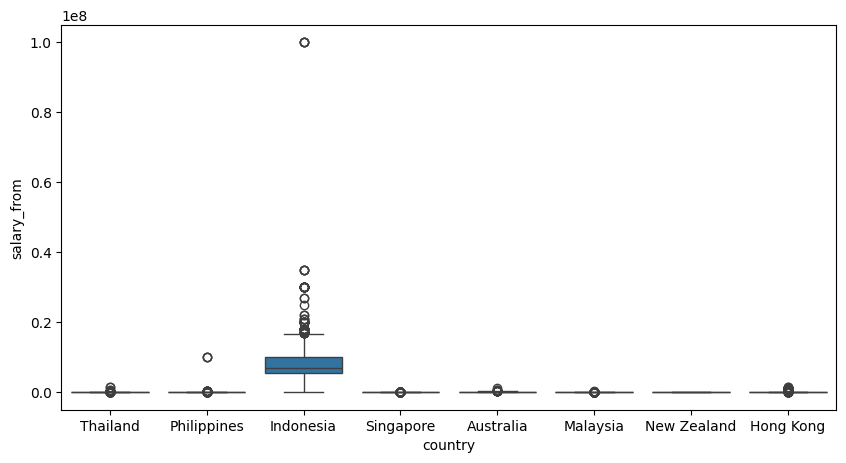

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='country', y='salary_from', data=dfc)
plt.show()

# Indonesia
            # - The median salary in Indonesia is significantly higher compared to other countries.
            # - The interquartile range (IQR) is wide → indicating substantial salary variation.
            # - Numerous upper outliers → suggesting the presence of high-paying roles, possibly senior positions or specialized job roles.

# Other countries
            # - Indicate a more stable job market or more uniform salary standards.

# Note: Salaries are shown in each country's local currency.

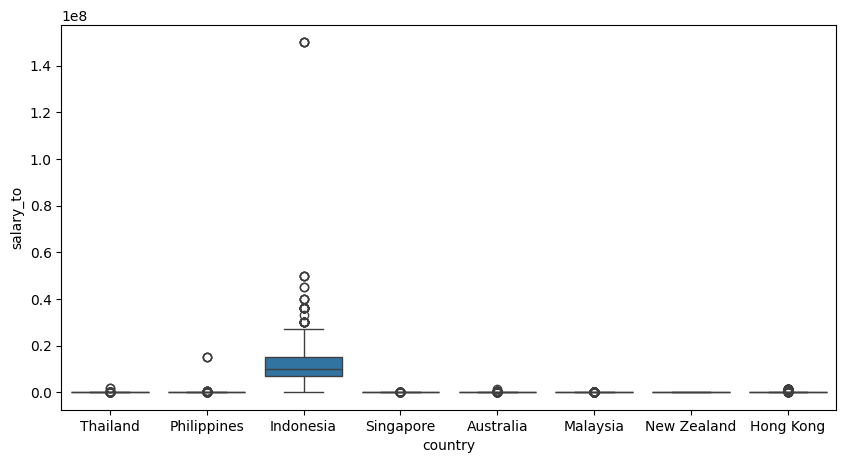

In [42]:
plt.figure(figsize=(10, 5))  # Width 10, height 5
sns.boxplot(x='country', y='salary_to', data=dfc)
plt.show()

# The distribution of 'salary_to' is similar to 'salary_from',
# with Indonesia showing greater salary variation and a high number of upper outliers.

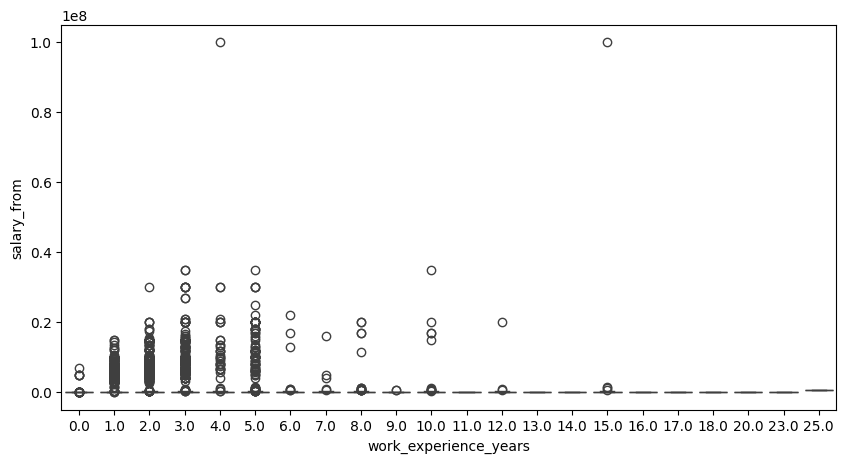

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='work_experience_years', y='salary_from', data=dfc)
plt.show()

## Save to csv

In [44]:
dfc.to_csv('hasil_cleaning.csv', index=False)